# Open in Google Colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arsalmairaj2k/Stochastic-Gradient-Descent-SGD/blob/main/SGD_for_LinearRegression.ipynb)

# 1. Derivation of gradient update rule using Mean Squared Error loss.

**We consider a simple linear regression model:**

y_pred = w * x + b

**where:**

y_pred is the predicted value.

x is the input feature.

w is the weight (slope).

b is the bias (intercept).

**The MSE loss function is defined as:**

MSE = (1/n) * Σ (y_true - y_pred)^2

**where:**

n is the number of samples.

y_true is the actual target value.

y_pred is the predicted value.


**We need to find the partial derivatives of the MSE with respect to the weights w. Let's expand the MSE equation:**

MSE = (1/n) * (y^T y - y^T Xw - w^T X^T y + w^T X^T X w)

**Now, let's take the partial derivative with respect to w:**

∂MSE/∂w = (1/n) * (-X^T y - (-X^T y) + 2 X^T X w)

∂MSE/∂w = (1/n) * (-2 X^T y + 2 X^T X w)

∂MSE/∂w = (2/n) * (X^T X w - X^T y)

∂MSE/∂w = (2/n) * X^T (X w - y)

∂MSE/∂w = (2/n) * X^T (y_pred - y_true)

**In gradient descent, we update the weights by moving in the opposite direction of the gradient:**

w_new = w_old - α * ∂MSE/∂w

**where:**

α is the learning rate.

**Substituting the gradient:**

w_new = w_old - α * (2/n) * X^T (y_pred - y_true)

**Therefore, the simplified gradient update rule is:**

w_new = w_old - α * X^T (y_pred - y_true)
ing rate.**


# 2. Stochastic Gradient Descent (SGD) for Linear Regression

This following code trains a simple linear regression model using Stochastic Gradient Descent (SGD) on the Iris dataset. The model predicts sepal width based on sepal length.

## Steps
1. **Load & Preprocess Data:** Extract sepal length (feature) & sepal width (target). Normalize the feature using StandardScaler. Add a bias term (intercept).  

2. **SGD Implementation:**
Initialize random weights. Iterate over epochs,sShuffle data to prevent order dependency. Then perform weight updates using SGD (one data point at a time). After that track Mean Squared Error (MSE) over epochs.  

3. **Train & Evaluate:**
Train the model using SGD with α=0.01 for 100 epochs, plot MSE vs. epochs to visualize convergence and print final model parameters.



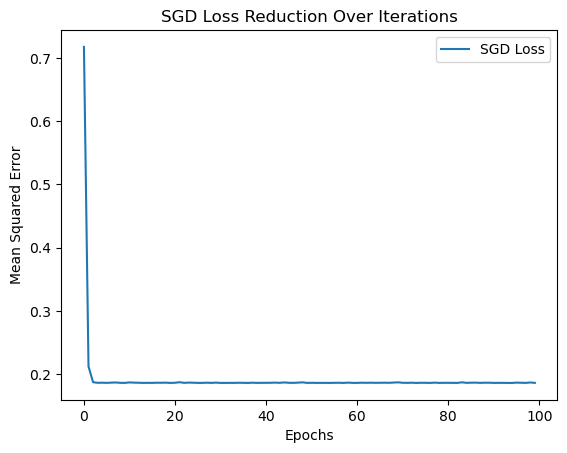

Final weights (w, b): [-0.04686463  3.04977594]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 0].reshape(-1, 1)  # Sepal length (feature)
y = iris.data[:, 1].reshape(-1, 1)  # Sepal width (target)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term (intercept)
X = np.hstack((X, np.ones((X.shape[0], 1))))  # [X | 1]

def train_sgd(X, y, alpha=0.01, epochs=100):
    """ Train Linear Regression using Stochastic Gradient Descent (SGD) """
    np.random.seed(42)
    w = np.random.randn(2, 1)  # Initialize weights (including bias)

    loss_history = []

    for epoch in range(epochs):
        # Shuffle data to avoid learning in a fixed order
        indices = np.random.permutation(X.shape[0])
        X_shuffled, y_shuffled = X[indices], y[indices]

        for i in range(X.shape[0]):  # SGD: Process one data point at a time
            xi = X_shuffled[i].reshape(1, -1)
            yi = y_shuffled[i, 0] #ensure yi is a number

            # Compute prediction and error
            error = np.dot(xi, w) - yi

            # Compute gradient and update weights
            grad_w = xi.T * error
            w -= alpha * grad_w

        # Compute overall loss for the epoch
        loss = np.mean((y - np.dot(X, w)) ** 2)
        loss_history.append(loss)

    return w, loss_history

# Train model using SGD
w_sgd, loss_history = train_sgd(X, y, alpha=0.01, epochs=100)

# Plot loss over epochs
plt.plot(range(len(loss_history)), loss_history, label="SGD Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("SGD Loss Reduction Over Iterations")
plt.legend()
plt.show()

# Print final parameters
print(f"Final weights (w, b): {w_sgd.flatten()}")


Loss curve shows gradual reduction in MSE. Final weights (w, b) indicate learned model parameters.

# 3. Gradient Descent Variants for Linear Regression

The following code trains a linear regression model using three different gradient descent methods:
1. **Batch Gradient Descent (BGD)**
2. **Mini-Batch Gradient Descent (MBGD)**
3. **Stochastic Gradient Descent (SGD)**  


We ises the same Iris dataset for predicting sepal width from sepal length. Feature is standardized, and a bias term is added.

---

## Training Process
- Initialize weights randomly.
- Shuffle data at each epoch.
- Use different batch sizes:
  - batch_size = None → **BGD** (uses all data)
  - batch_size = 10 → **Mini-Batch GD**
  - batch_size = 1 → **SGD** (one sample at a time)
    
Update weights using gradient descent and track Mean Squared Error (MSE) over epochs.

## Results at the end
- **Loss curves** compare convergence speed of **SGD, Mini-Batch GD, and BGD**.
- **Final weights** for each method are displayed.


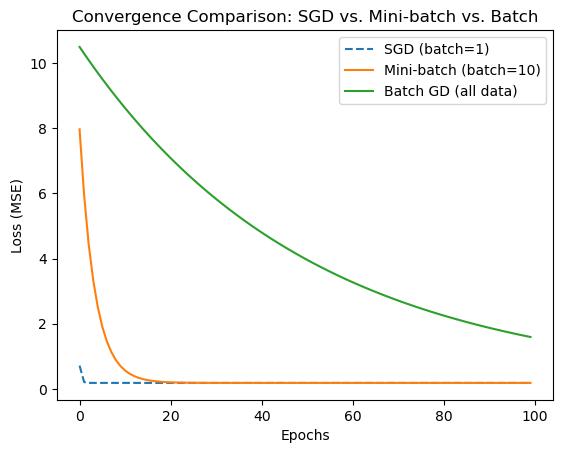

SGD Final Weights: [-0.04686463  3.04977594]
Mini-Batch Final Weights: [-0.05157395  3.05742381]
Batch GD Final Weights: [0.14943443 1.88764125]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 0].reshape(-1, 1)  # Sepal length (feature)
y = iris.data[:, 1].reshape(-1, 1)  # Sepal width (target)

# Normalize X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term
X = np.hstack((X, np.ones((X.shape[0], 1))))  # [X | 1]

def train_gradient_descent(X, y, alpha=0.01, epochs=100, batch_size=None):
    """Train Linear Regression using Batch, Mini-batch, or Stochastic Gradient Descent"""
    np.random.seed(42)
    w = np.random.randn(2, 1)  # Initialize weights (including bias)
    loss_history = []

    for epoch in range(epochs):
        # Shuffle data
        indices = np.random.permutation(X.shape[0])
        X_shuffled, y_shuffled = X[indices], y[indices]

        # Define batch size
        if batch_size is None:  # BGD: Use all data points
            batch_size = X.shape[0]
        elif batch_size == 1:  # SGD: Process one sample at a time
            batch_size = 1

        # Iterate over mini-batches
        for i in range(0, X.shape[0], batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute predictions
            y_pred = np.dot(X_batch, w)

            # Compute gradients (vectorized)
            grad_w = np.dot(X_batch.T, (y_pred - y_batch)) / batch_size

            # Update weights
            w -= alpha * grad_w

        # Compute loss for the epoch
        loss = np.mean((y - np.dot(X, w)) ** 2)
        loss_history.append(loss)

    return w, loss_history

# Training different methods
w_sgd, loss_sgd = train_gradient_descent(X, y, alpha=0.01, epochs=100, batch_size=1)  # SGD
w_mbgd, loss_mbgd = train_gradient_descent(X, y, alpha=0.01, epochs=100, batch_size=10)  # Mini-batch (10)
w_bgd, loss_bgd = train_gradient_descent(X, y, alpha=0.01, epochs=100, batch_size=None)  # Batch

# Plot loss comparison
plt.plot(loss_sgd, label="SGD (batch=1)", linestyle="dashed")
plt.plot(loss_mbgd, label="Mini-batch (batch=10)")
plt.plot(loss_bgd, label="Batch GD (all data)")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Convergence Comparison: SGD vs. Mini-batch vs. Batch")
plt.legend()
plt.show()

# Print final weights
print(f"SGD Final Weights: {w_sgd.flatten()}")
print(f"Mini-Batch Final Weights: {w_mbgd.flatten()}")
print(f"Batch GD Final Weights: {w_bgd.flatten()}")


# 4. Gradient Descent with Momentum on Iris Dataset

The plot provides provides results for Gradient Descent with Momentum on Iris Dataset with **Batch, Mini-batch, and Stochastic GD**.

## Hyperparameter Analysis
### **Effect of Learning Rate (α)**
| α Value  | Observation |
|----------|------------|
| `0.001`  | Very slow convergence |
| `0.01`   | Steady descent |
| `0.1`    | Fast convergence |
| `0.5`    | Oscillations/Divergence |

### **Effect of Momentum (β)**
| β Value  | Observation |
|----------|------------|
| `0.0`    | Slower convergence (plain GD) |
| `0.5`    | Mild smoothing |
| `0.9`    | Faster convergence |
| `0.99`   | Risk of overshooting |


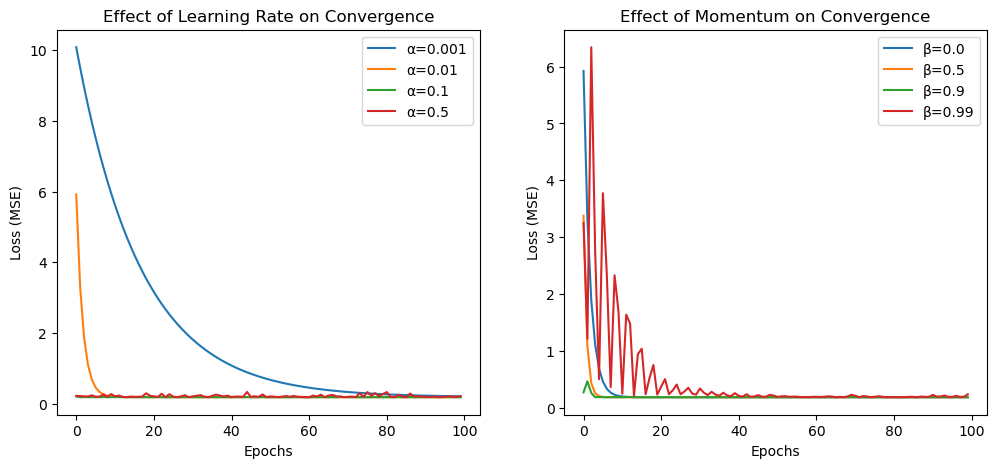

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 0].reshape(-1, 1)  # Sepal length (feature)
y = iris.data[:, 1].reshape(-1, 1)  # Sepal width (target)

# Normalize X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term
X = np.hstack((X, np.ones((X.shape[0], 1))))  # [X | 1]

def train_gd_momentum(X, y, alpha=0.01, epochs=100, batch_size=None, momentum=0.0):
    """Train Linear Regression using Gradient Descent with Momentum"""
    np.random.seed(42)
    w = np.random.randn(2, 1)  # Initialize weights
    v = np.zeros_like(w)  # Initialize velocity for momentum
    loss_history = []

    for epoch in range(epochs):
        # Shuffle data
        indices = np.random.permutation(X.shape[0])
        X_shuffled, y_shuffled = X[indices], y[indices]

        # Define batch size
        if batch_size is None:  # Batch GD
            batch_size = X.shape[0]
        elif batch_size == 1:  # SGD
            batch_size = 1

        # Iterate over mini-batches
        for i in range(0, X.shape[0], batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute predictions
            y_pred = np.dot(X_batch, w)

            # Compute gradients
            grad_w = -2 * np.dot(X_batch.T, (y_batch - y_pred)) / batch_size

            # Apply momentum: v = β * v - α * grad_w
            v = momentum * v - alpha * grad_w

            # Update weights: w = w + v
            w += v

        # Compute loss for epoch
        loss = np.mean((y - np.dot(X, w)) ** 2)
        loss_history.append(loss)

    return w, loss_history

# Different Learning Rates
alphas = [0.001, 0.01, 0.1, 0.5]
losses_lr = {}

for alpha in alphas:
    _, loss = train_gd_momentum(X, y, alpha=alpha, epochs=100, batch_size=10, momentum=0.0)
    losses_lr[alpha] = loss

# Different Momentum Values
momentums = [0.0, 0.5, 0.9, 0.99]
losses_momentum = {}

for momentum in momentums:
    _, loss = train_gd_momentum(X, y, alpha=0.01, epochs=100, batch_size=10, momentum=momentum)
    losses_momentum[momentum] = loss

# Plot Learning Rate Effect
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for alpha, loss in losses_lr.items():
    plt.plot(loss, label=f"α={alpha}")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Effect of Learning Rate on Convergence")
plt.legend()

# Plot Momentum Effect
plt.subplot(1, 2, 2)
for momentum, loss in losses_momentum.items():
    plt.plot(loss, label=f"β={momentum}")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Effect of Momentum on Convergence")
plt.legend()

plt.show()
